In [2]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#import assignment data
info = pd.read_csv(r"C:\Users\Tori\Documents\SigFig Homework\FHC_passenger_info.csv", encoding = "latin-1")
journey =pd.read_csv(r"C:\Users\Tori\Documents\SigFig Homework\FHC_passenger_journey.csv", encoding = "latin-1")

In [4]:
#sanity check if import was correct/ encoding was right
info.head()

,passenger_id,household_income,college_saving,retirement_contribution_strategy,assets_retirement_pct_invested,assets_retirement,client_employment_status,housing_situation,saving_emergency_fund_months,assets_liquid,...,education,employer_sponsored,has_children,has_dependent_relatives,has_partner,healthcare,lower_monthly_payment,managing_credit_score,moving,new_child
0,31412,255750.0,"Yes, in an Education Savings Account (ESA such...",I save enough to get my employer match,NaN,"$250,000-$500,000",Employed (full or part time),Own my home with a mortgage,4-6 months,"$20,000-$50,000",...,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,0.0,1.0
1,19596,258100.0,"Yes, in an Education Savings Account (ESA such...",I save enough to get my employer match,NaN,"More than $500,000",Employed (full or part time),Own my home with a mortgage,More than 6 months,"$50,000-$100,000",...,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0
2,155358,141100.0,"Yes, in an Education Savings Account (ESA such...","I save a bit, as I can",NaN,"$250,000-$500,000",Employed (full or part time),Own my home with a mortgage,2-3 months,"$20,000-$50,000",...,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0
3,156461,324000.0,"Yes, in an Education Savings Account (ESA such...",I save enough to get my employer match,NaN,"$100,000-$250,000",Employed (full or part time),Own my home with a mortgage,More than 6 months,"$20,000-$50,000",...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,1.0
4,137701,114800.0,"Yes, in an Education Savings Account (ESA such...","I save a bit, as I can",NaN,"$100,000-$250,000",Employed (full or part time),Own my home with a mortgage,More than 6 months,I don't have any savings,...,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0


In [5]:
#Gauge the size of the df
info.shape

(1728, 30)

In [6]:
#gauge size of other df
journey.head()

,atlas_unique_passenger_id,Target,marketing_type,hasRecommendation,hasStartedContactForm,hasSubmittedFullContactInfo,parent_journey_name
0,20256,New Customers,Paid Digital,0,0,0,Financial Health Checkup
1,25313,New Customers,Paid Digital,0,0,0,Financial Health Checkup
2,168819,New Customers,Paid Digital,0,0,0,Financial Health Checkup
3,19905,New Customers,Paid Digital,0,0,0,Financial Health Checkup
4,197332,New Customers,Paid Digital,0,0,0,Financial Health Checkup


In [7]:
### Data Cleaning

In [8]:
##Start by cleaning the Journey dataset since it's sparser
journey.head()

,atlas_unique_passenger_id,Target,marketing_type,hasRecommendation,hasStartedContactForm,hasSubmittedFullContactInfo,parent_journey_name
0,20256,New Customers,Paid Digital,0,0,0,Financial Health Checkup
1,25313,New Customers,Paid Digital,0,0,0,Financial Health Checkup
2,168819,New Customers,Paid Digital,0,0,0,Financial Health Checkup
3,19905,New Customers,Paid Digital,0,0,0,Financial Health Checkup
4,197332,New Customers,Paid Digital,0,0,0,Financial Health Checkup


In [9]:
###Parameters:
### User who has a recommendation "hasRec ==1"
#We only care about users who started the Rec process
journey_clean=journey[(journey["hasRecommendation"]==1)]

In [10]:
journey_clean

,atlas_unique_passenger_id,Target,marketing_type,hasRecommendation,hasStartedContactForm,hasSubmittedFullContactInfo,parent_journey_name
294,50275,Existing Users,Not Paid Digital,1,1,0,Financial Health Checkup
864,157475,New Customers,Paid Digital,1,0,0,Financial Health Checkup
1083,28936,Existing Users,Not Paid Digital,1,1,0,Financial Health Checkup
1159,71613,Existing Users,Not Paid Digital,1,1,0,Financial Health Checkup
1171,63402,Existing Users,Not Paid Digital,1,0,0,Financial Health Checkup
...,...,...,...,...,...,...,...
58966,153873,New Customers,Paid Digital,1,1,1,Financial Health Checkup
59133,74051,New Customers,Paid Digital,1,1,1,Financial Health Checkup
59286,63263,New Customers,Not Paid Digital,1,0,0,Financial Health Checkup
59317,163034,New Customers,Paid Digital,1,0,0,Financial Health Checkup


In [11]:
#check if this column has more than one value, if not, it's not meaningful.
journey_clean["parent_journey_name"].nunique()

1

In [12]:
#Clean out meaningless column
journey_clean=journey_clean.drop("parent_journey_name", axis =1)

In [13]:
#Convert variables from categorical to one-hot encoded for easier analysis later
journey_dummies= pd.get_dummies(journey_clean, columns=["Target", "marketing_type"])

In [14]:
journey_dummies

,atlas_unique_passenger_id,hasRecommendation,hasStartedContactForm,hasSubmittedFullContactInfo,Target_Existing Users,Target_New Customers,Target_Testing Users - QVRI,marketing_type_Not Paid Digital,marketing_type_Paid Digital
294,50275,1,1,0,1,0,0,1,0
864,157475,1,0,0,0,1,0,0,1
1083,28936,1,1,0,1,0,0,1,0
1159,71613,1,1,0,1,0,0,1,0
1171,63402,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
58966,153873,1,1,1,0,1,0,0,1
59133,74051,1,1,1,0,1,0,0,1
59286,63263,1,0,0,0,1,0,1,0
59317,163034,1,0,0,0,1,0,0,1


In [15]:
### Passenger info cleaning

In [16]:
#Drop columns with only one value. They don't tell us anything meaningful
cols= info.columns
drop=[]
for col in cols:
    if (info[col].nunique() ==0):
        drop.append(col)
info_drop=info.drop(drop, axis=1)

In [17]:
#Check if there were any useless columns
info_drop.shape

(1728, 29)

In [18]:
##Convert categoricals to one-hot encoding
info_dummies=pd.get_dummies(info_drop)

In [19]:
#check df shape
info_dummies.shape

(1728, 85)

In [20]:
#There's a bunch of nans in this dataset, probably representing how far or not someone got in the survey/ unanswered questions. Let's preserve that
info_dummies["no_answers"]=info_dummies.isnull().sum(axis=1)

In [21]:
#check to see if new column populated
info_dummies

,passenger_id,household_income,rent_monthly,client_age,sentiment_finances,divorce,education,employer_sponsored,has_children,has_dependent_relatives,...,mortgage_term_Some other term,mortgage_rate_3.5% - 3.99%,mortgage_rate_4.0% - 4.49%,mortgage_rate_4.5% - 4.99%,mortgage_rate_5.0% or higher,mortgage_rate_Under 3.5%,estate_plan_No,estate_plan_Not sure,estate_plan_Yes,no_answers
0,31412,255750.0,NaN,35.03,83.7,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,3
1,19596,258100.0,NaN,69.44,25.2,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,3
2,155358,141100.0,NaN,49.35,100.8,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,3
3,156461,324000.0,NaN,38.85,55.8,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,3
4,137701,114800.0,NaN,38.70,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,59250,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,14
1724,27928,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,14
1725,120683,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,14
1726,148956,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,14


In [22]:
### Merge Data

In [23]:
#merge the two datasets. We only care about variables that have Recs, (ones that are in Journey_dummies)
df_merge= pd.merge(journey_dummies, info_dummies, left_on="atlas_unique_passenger_id", right_on="passenger_id", how="left")

In [24]:
#drop id columns now that we've merged the datasets
no_id=df_merge.drop(["atlas_unique_passenger_id", "passenger_id"], axis=1)

In [25]:
no_id.shape

(387, 93)

In [26]:
## Data vis imports
import seaborn as sns ##I really like seaborn's ease of syntax

Text(0.5, 1.0, 'Responses by Status')

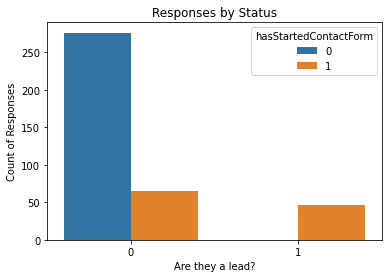

In [27]:
#Do a really quick vis to see the proportion of folks who finish the form (become leads) vs don't. And whether they bother to start.
sns.countplot(x="hasSubmittedFullContactInfo", hue="hasStartedContactForm", data=no_id)
plt.xlabel("Are they a lead?")
plt.ylabel("Count of Responses")
plt.title("Responses by Status")


In [28]:
#How many don't even bother to start the form?
no_id[(no_id["hasStartedContactForm"]==0)].shape

(276, 93)

In [29]:
#How many don't finish?
no_id[(no_id["hasSubmittedFullContactInfo"]==0)].shape

(341, 93)

So, right away here we can see that the big difference here is that a lot of people who get a Recommendation don't even bother to start the contact form, much less finish it. Right away, it makes sense to make starting the contact form a mandatory part of the recommendation process if it isn't already. That represents 276 out of 341 responses that don't finish or 80.9% of non leads.

Having discovered that most people who get a Rec don't bother to even start the contact form, let's dig into the differences between the people who finish the form and the people who start it but don't finish.

In [64]:
###Filter out just the starts
starts=no_id[(no_id["hasStartedContactForm"]==1)]
starts=starts.drop(["hasStartedContactForm","hasRecommendation"], axis=1)

In [65]:
#clean for further analysis
starts["rent_monthly"].fillna(0, inplace=True)


In [70]:
#correlations
corrs=starts.corr()
corrs=corrs["hasSubmittedFullContactInfo"]

In [76]:
#check strongest positive correlations
corrs.sort_values(ascending=False).head(10)

hasSubmittedFullContactInfo                                    1.000000
retirement_contribution_strategy_Not currently contributing    0.255658
client_age                                                     0.210315
assets_liquid_$5,000-$10,000                                   0.178277
marketing_type_Paid Digital                                    0.169293
assets_retirement_Less than $10,000                            0.165760
client_employment_status_Not working / Other                   0.152105
assets_liquid_I don't have any savings                         0.128531
mortgage_type_VA or FHA Loan                                   0.113340
mortgage_rate_5.0% or higher                                   0.113340
Name: hasSubmittedFullContactInfo, dtype: float64

Here we can see the strongest correlates with actually finishing the form and becoming a lead:
Users who are not currently contributing to retirement (0.25)
As clients get older (positive correlation between age and and becoming a lead) (0.21)
Users with liquid assets between $5k and 10K (0.178)
Users who found out about sigfig via a paid digital ad (0.169)

In [75]:
#check strongest negative correlations
corrs.sort_values(ascending=True).head(10)

household_income                                                               -0.254138
assets_liquid_More than $100,000                                               -0.249887
college_saving_Yes, in an Education Savings Account (ESA such as a 529 plan)   -0.249887
assets_retirement_More than $500,000                                           -0.218250
retirement_contribution_strategy_I save enough to get my employer match        -0.192165
rent_monthly                                                                   -0.176661
marketing_type_Not Paid Digital                                                -0.169293
mortgage_type_Fixed rate mortgage                                              -0.162652
client_employment_status_Employed (full or part time)                          -0.159341
has_partner                                                                    -0.153888
Name: hasSubmittedFullContactInfo, dtype: float64

Here are some of the negative correlations with becoming a lead (so, users who don't bother):
As household income goes up, lead status goes down (-.25)
Liquid assets of one-hundred thousand or above range are negatively correlated (-.24)
Already saving for college is negatively correlated (-.24)
Having more than half a million in retirement is negatively correlated (-.218)
Saving to meet employer match is negatively correlated (-.19)